In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [4]:
#loading the dataset
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [9]:
# checking data how it looks like
fake.head(10)
fake.tail(10)

,title,text,subject,date
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016"
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016"
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016"
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016"
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [11]:
#checking different subjects and there counts
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [12]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
true.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [15]:
# creating a category for whether fake or true
fake["category"]=1
true["category"]=0

In [18]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)

In [20]:
# to check the data
df.tail()

,title,text,subject,date,category
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




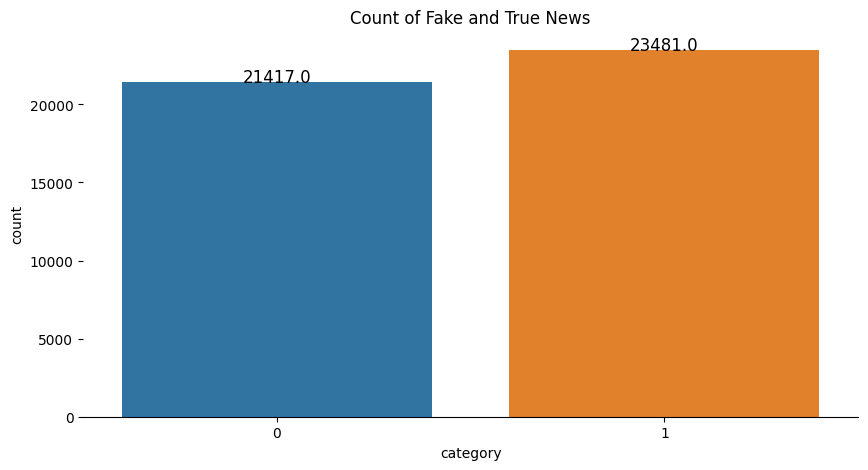

In [23]:
# creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x = "category", data = df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width() / 2., height + 0.2,height ,ha = "center",fontsize = 12)

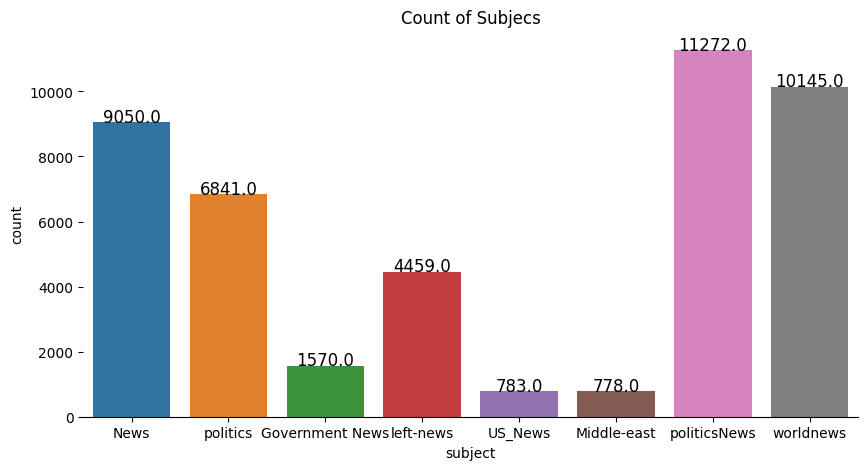

In [24]:
# creating a count plot for subject column
fig = plt.figure(figsize = (10,5))



graph = sns.countplot(x = "subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x() + p.get_width() / 2., height + 0.2,height ,ha = "center",fontsize = 12)

In [27]:
df = df[["text","category"]]

In [28]:
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [31]:
# checking the missing values in each columns
df.isna().sum()* 100 / len(df)

text        0.0
category    0.0
dtype: float64

In [33]:

# checking if there is empty string in TEXT column
blanks = []

# index,label and review of the doc
for index,text in df["text"].items(): # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) # it will be noted down in empty list

len(blanks)

631

In [34]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [36]:
df["text"][10922]

'This Congresswoman has a potty mouth and a bitter attitude towards whites. She s a hateful racist who is paranoid that everyone is out to get her. She just tossed baseless accusations at the Trump administration in an appearance on The Washington Post podcast  Cape Up with Jonathan Capehart.  (See our previous report on the interview below.)Here are the lowlights:Waters accused President Trump of colluding with Russia during the 2016 election, without offering evidence.  I believe this President has colluded with the Russians, with the Kremlin, with the oligarchs, perhaps, of Russia to undermine our election systems,  Waters told Capehart. (4:00) The California congresswoman also criticized the Senate investigation into Trump-Russia ties as not credible.  They re not moving fast enough!  she exclaimed. However, she praised the media for their investigations into Trump-Russia ties. (4:35) Waters described Attorney General Jeff Sessions as a  throwback to the days of Jim Crow,  equating

In [37]:
df.shape

(44898, 2)

In [38]:
df.drop(blanks, inplace = True)

In [39]:
df.shape

(44267, 2)

In [40]:
# importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

# loading spacy library
nlp = spacy.load("en_core_web_sm")

In [41]:
# creating instance
lemma = WordNetLemmatizer()

In [42]:
# creating list of stopwords containing stopwords from spacy and nltk

# stopwords of spacy
list1 = nlp.Defaults.stop_words
print(len(list1))

# stopwords of NLTK
list2 = stopwords.words('english')
print(len(list2))

# combining the stopword list
Stopwords = set((set(list1)|set(list2)))
print(len(Stopwords))

326
198
401


In [44]:
# text cleaning function
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    
    string = ""
    
    # lower casing
    text = text.lower()
    
    # simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    # removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string += lemma.lemmatize(word)+" "
    
    return string

In [43]:
df["text"][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [45]:
clean_text(df["text"][10])

'centerpiece donald trump campaign presidency white supremacist way public feud get involve people color favorite target course player national football league dare exercise amendment right kneeling national anthem protest racist police brutality person figured racism bad business orange overlord elected founder pizza chain papa john man right history number issue plus pizza suck decided complain player protesting sale dropped turn racism pay know corporation line papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december 21 2017the thing people certainly allowed political opinion realize opinion come dire consequence especially business trying garner sale support people presume goal ceo know pressure shareholder public outcry boycott nfl stepping right know gone future ceo run company inclusive diverse fabric america guiding symbol nation statue liberty bigot like

In [46]:
# cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [48]:
df["text"][0]

'donald trump wish american happy new year leave instead shout enemy hater dishonest fake news medium reality star job country rapidly grows stronger smarter want wish friend supporter enemy hater dishonest fake news medium happy healthy new year president angry pant tweeted 2018 great year america country rapidly grows stronger smarter want wish friend supporter enemy hater dishonest fake news medium happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizen happy new year bishop talbert swan talbertswan december 31 2017no like calvin calvinstowell december 31 2017your impeachment 2018 great year america accept regaining control congress miranda yaver mirandayaver december 31 2017do hear talk include people hate wonder hate alan sandoval alansandoval13 december 31 2017who us wor

In [49]:

from wordcloud import WordCloud

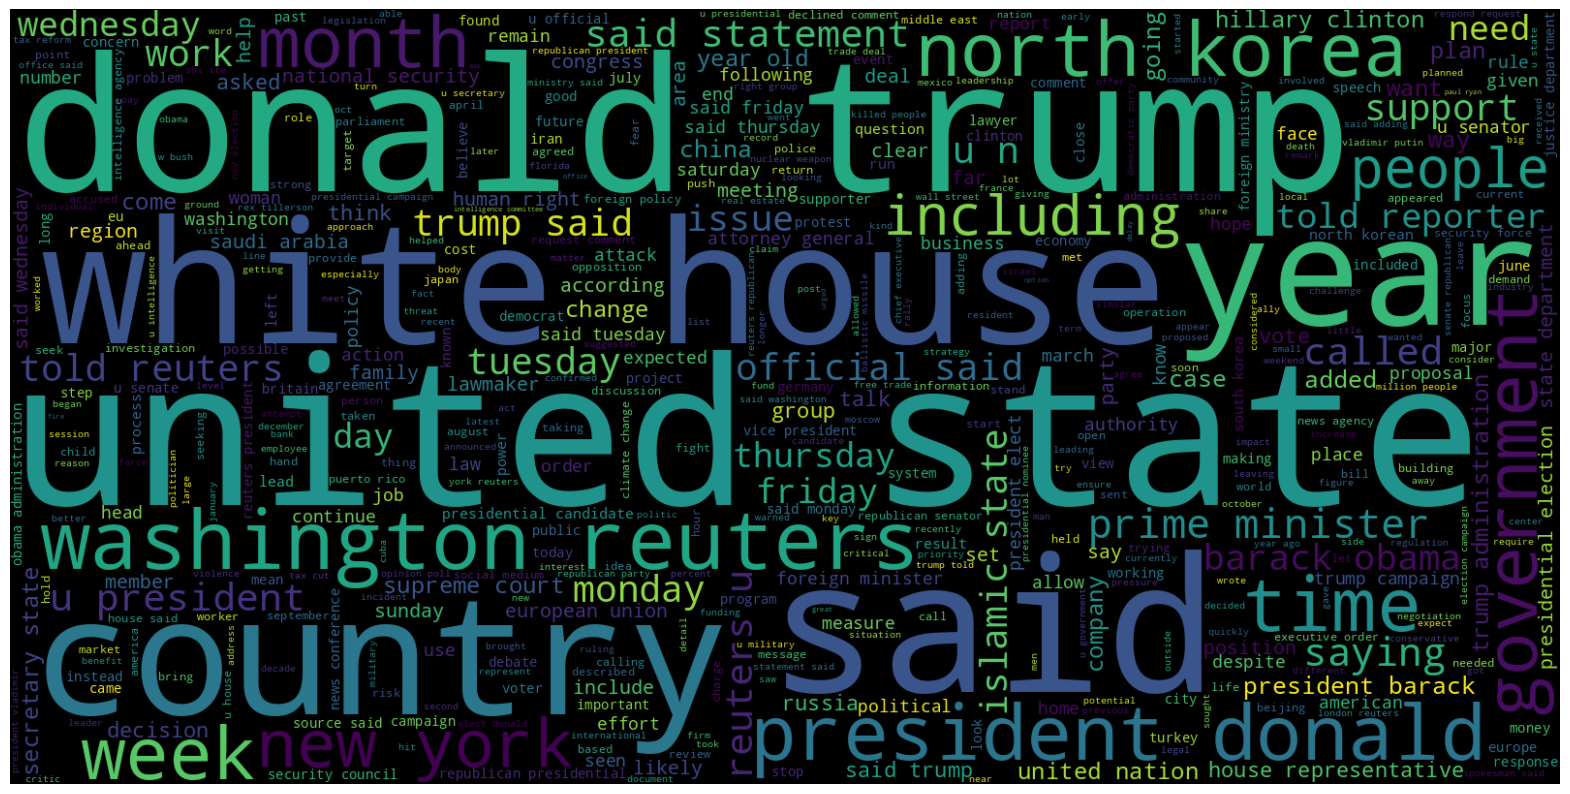

In [50]:

# True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [51]:
# creating more intiuive wordcloud 

# pil is pillow and used for image manupulation
from PIL import Image

In [52]:
#creating a mask of thumb
thumb="/kaggle/input/image-wordcloud/thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

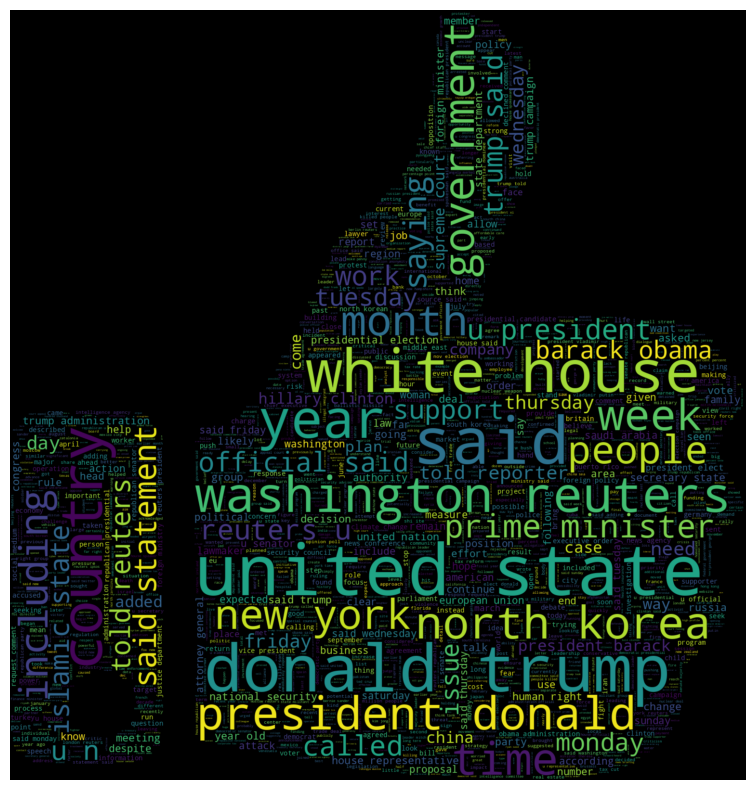

In [53]:
# True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [54]:
# creating word cloud using skull image for fake news which depict that 
# fake news are dangerous 

skull="/kaggle/input/image-wordcloud/skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

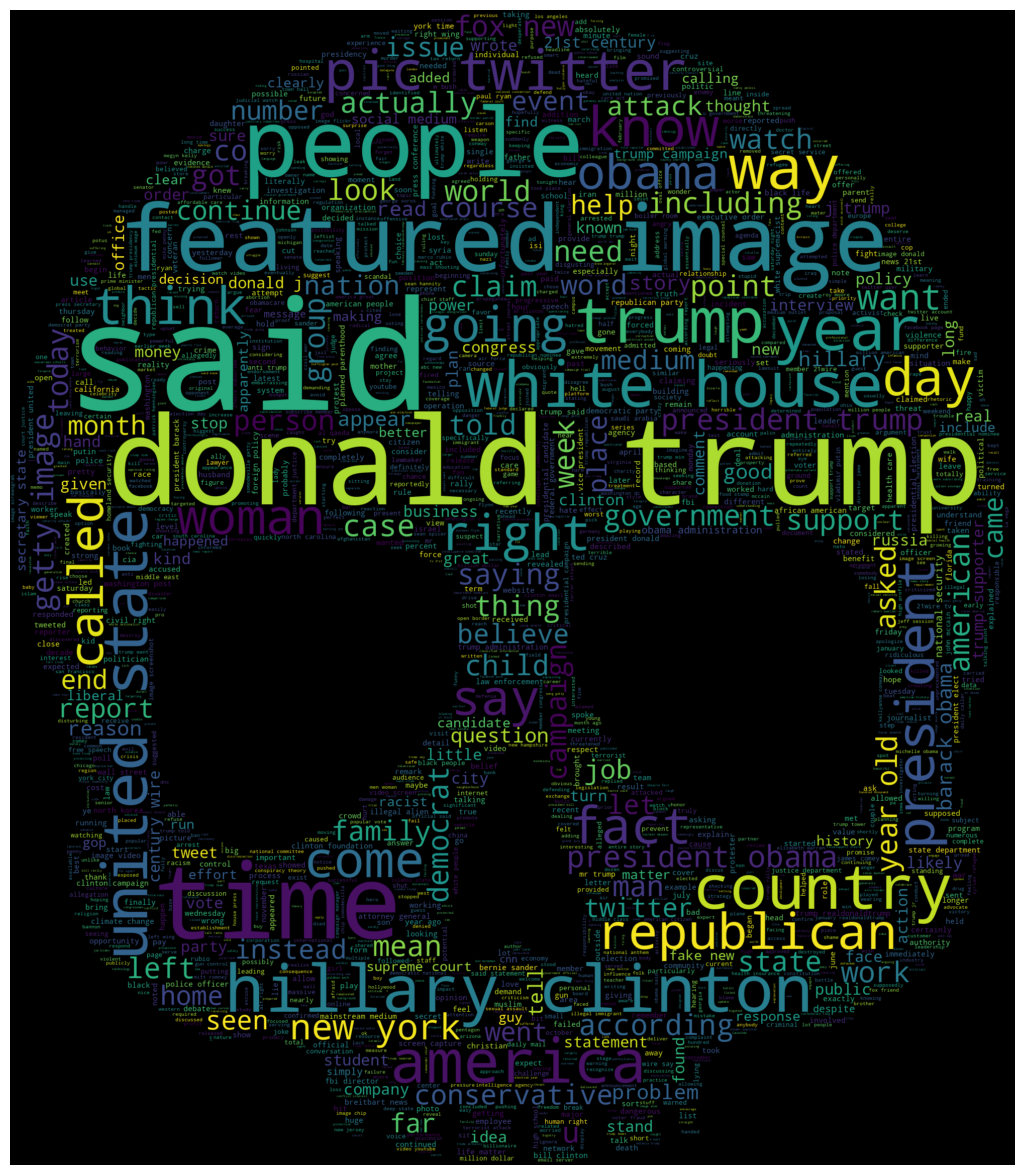

In [55]:

# Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [56]:
# splitting the 
from sklearn.model_selection import train_test_split


X=df["text"] # feature 
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
# TFIDF vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [60]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4425475 stored elements and shape (29658, 95269)>

In [61]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [63]:

# importing libraries to build a pipline
from sklearn.pipeline import Pipeline
text_clf = Pipeline([("tfidf", TfidfVectorizer()),("clf", LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [64]:

# making prediction using the model
predictions=text_clf.predict(X_test)

In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       0.99      0.99      0.99      7562

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [66]:
# overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9932918064206996


In [67]:

# confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[7000   47]
 [  51 7511]]
